In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns

In [2]:
system_D = 2;
system_str = 'linear_%dD' % system_D;

behavior_str = 'oscillation';
bounds = [1.0, 2.0];

system_class = system_from_str(system_str);
system = system_class(behavior_str, bounds);
print(system.name)

linear_2D


In [3]:
# create test parameter grid

start = -1000.0;
stop = 1000.0;
res = 200;
vals = np.arange(start, stop, res);
num_pts = vals.shape[0];

total_pts = num_pts**4;
params = np.zeros((total_pts,4));
T_a_valid = np.zeros((total_pts, 6));
ind = 0;
for i in range(num_pts):
    a1 = vals[i];
    for j in range(num_pts):
        a2 = vals[j];
        for k in range(num_pts):
            a3 = vals[k];
            for l in range(num_pts):
                a4 = vals[l];
                params[ind,:] = np.array([a1, a2, a3, a4]);
                if ((a1 + a4)**2 >= 4*(a1*a4 + a2*a3)):
                    lambda_1_real = 0.5*((a1+a4) + np.sqrt((a1 + a4)**2 - 4*(a1*a4 + a2*a3)));
                    lambda_2_real = 0.5*((a1+a4) - np.sqrt((a1 + a4)**2 - 4*(a1*a4 + a2*a3)));
                    lambda_1_imag = 0.0;
                else:
                    if ((a1 + a4) == 0):
                        lambda_1_real = 0.0;
                        lambda_2_real = 0.0;
                        lambda_1_imag = np.sqrt(a1*a4 + a2*a3);
                    else:
                        lambda_1_real = (a1+a4)/2.0;
                        lambda_2_real = (a1+a4)/2.0;
                        lambda_1_imag = np.sqrt(4*(a1*a4 + a2*a3) - (a1 + a4)**2)/2.0;
                T_a_valid[ind,:] = np.array([lambda_1_real, np.square(lambda_1_real), \
                                             lambda_2_real, np.square(lambda_2_real), \
                                             lambda_1_imag, np.square(lambda_1_imag)]);
                if (np.count_nonzero(np.isnan(T_a_valid[ind,:])) > 0):
                    print('found nans');
                    print(a1,a2,a3,a4);
                    print(T_a_valid[ind,:])
                ind += 1;


print(np.count_nonzero(np.isnan(T_a_valid)));
print(np.count_nonzero(np.isinf(T_a_valid)));

0
0


In [4]:
num_params = system.D;
K = 1;
M = total_pts;
phi = tf.placeholder(dtype=tf.float64, shape=(K, M, num_params, 1));

T_a = system.analytic_suff_stats(phi);

_phi = np.expand_dims(np.expand_dims(params, 0), 3);

phi (1, 10000, 4, 1)


In [5]:
with tf.Session() as sess:
    _T_a = sess.run(T_a, {phi:_phi});

print(np.count_nonzero(np.isnan(_T_a)), 'nans');
print(np.count_nonzero(np.isinf(_T_a)), 'infs');

0 nans
0 infs


In [ ]:
# behavioral constraints
mu = np.array([0.0, 0.0, 4.0]);
Sigma = np.array([.001, .001, 1.0]);

behavior = {'mu':mu, 'Sigma':Sigma};


c_init 0.01
results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/
0 <tf_util.flows.PlanarFlowLayer object at 0x1229f6da0>
Tensor("Const_2:0", shape=(4, 1), dtype=float64)
Tensor("Const_3:0", shape=(1, 1), dtype=float64)
zshapes in
connect flow
(?, ?, 4, ?)
0 PlanarFlow_Layer1
(?, ?, 4, ?)
phi (?, ?, 4, ?)
(3,) (3,)
train network
training DSN for linear_2D: dt=0.001, T=1
AL iteration 1
resetting optimizer
saving model at iter 0
******************************************
it = 100 
H 5.328631475612543
cost -3.920386138769362


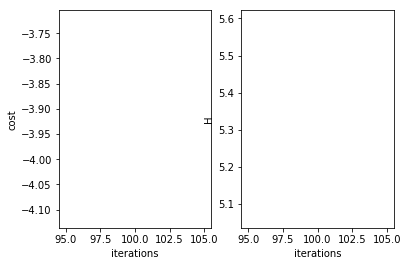

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 200 
H 5.300492240435834
cost -3.882748512870733


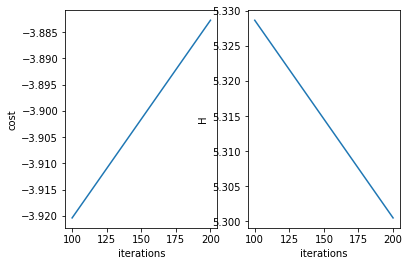

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 300 
H 5.240854556160011
cost -3.828173354229123


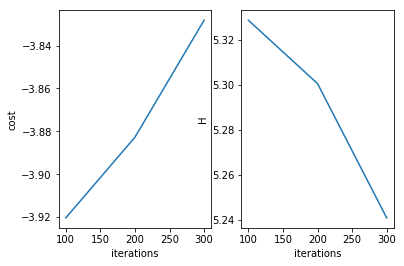

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 400 
H 5.14790255062357
cost -3.759158756805169


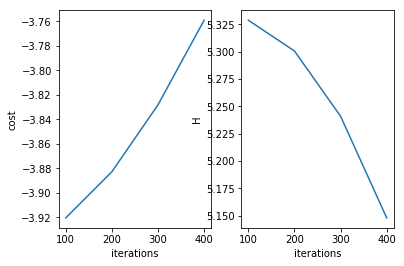

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 500 
H 5.23934186014168
cost -3.861568858305244


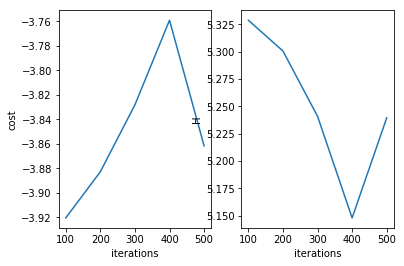

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 600 
H 5.128306751401315
cost -3.880732450116788


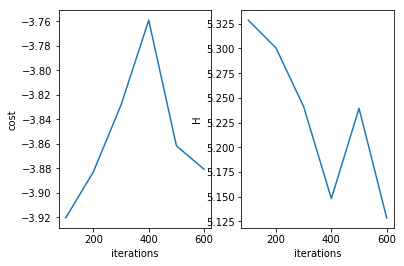

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 700 
H 5.138485276729483
cost -4.061715944167371


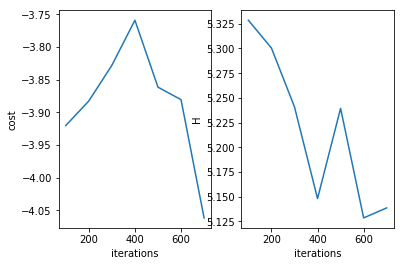

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 800 
H 5.279672134123604
cost -4.435014884143466


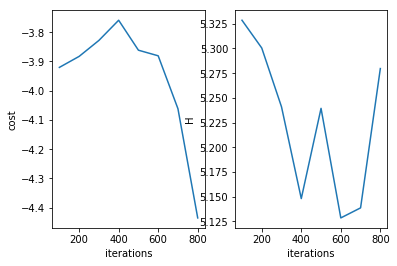

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 900 
H 5.119055637929672
cost -4.436270260424967


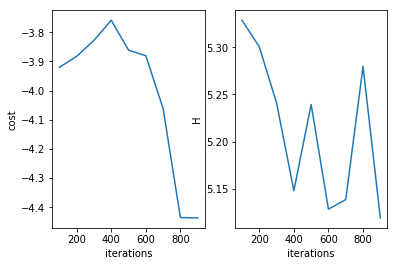

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1000 
H 5.092270952325526
cost -4.600300741710922


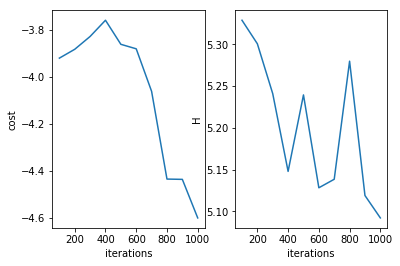

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1100 
H 5.070690888576926
cost -4.773061126854954


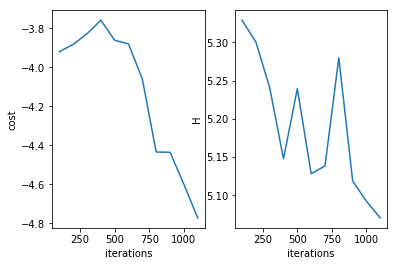

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1200 
H 5.013997339697186
cost -4.771542215083673


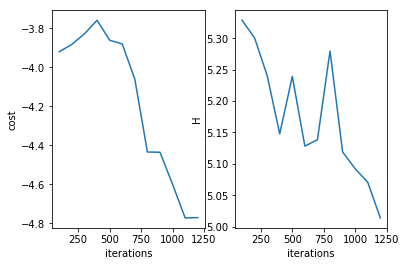

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1300 
H 4.982384175813929
cost -4.828597139998023


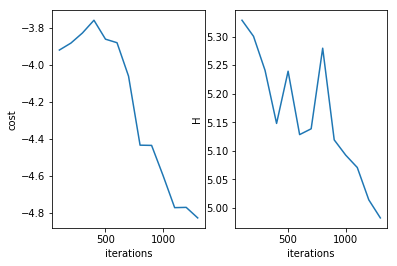

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1400 
H 5.052581585699431
cost -4.987779211577177


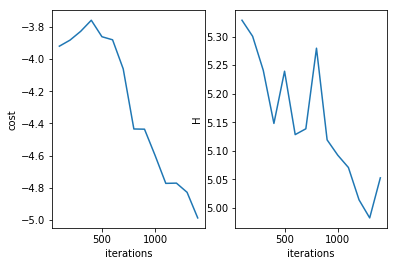

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1500 
H 5.0915265921349215
cost -5.060346425442642


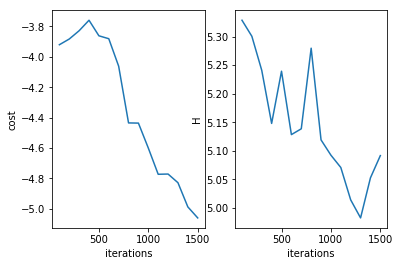

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 1600 
H 5.244142238309761
cost -5.234493529701186


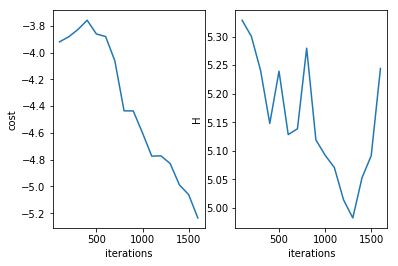

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1700 
H 5.074448222515637
cost -5.065185315937679


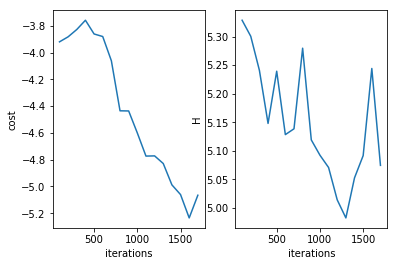

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1800 
H 5.04846562628256
cost -5.038579792132338


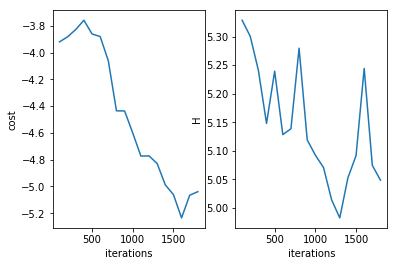

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 1900 
H 5.074076704785721
cost -5.064482247222056


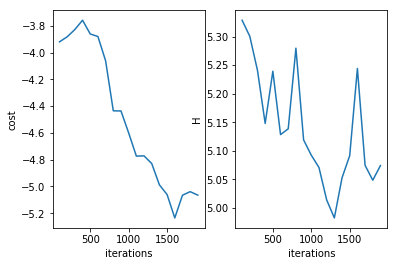

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2000 
H 5.097789517357225
cost -5.090237055578238


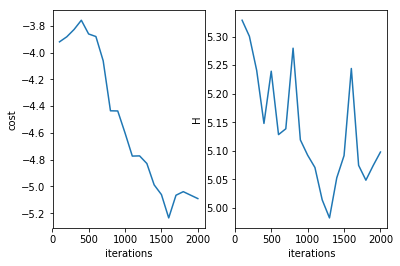

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2100 
H 5.117802498691129
cost -5.1099044086022545


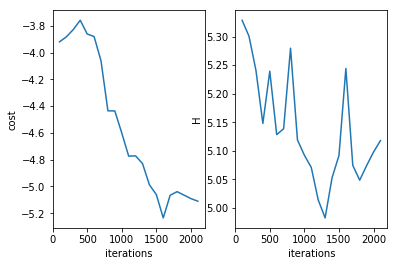

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2200 
H 5.074367888653797
cost -5.066501564722412


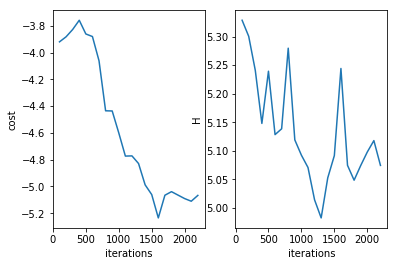

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2300 
H 5.209475977009002
cost -5.201245388950075


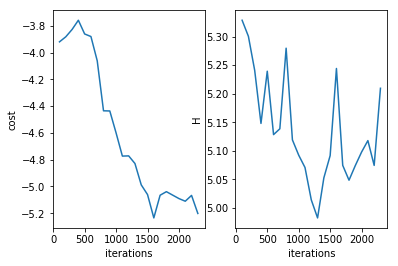

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2400 
H 5.10110819049253
cost -5.093371739341939


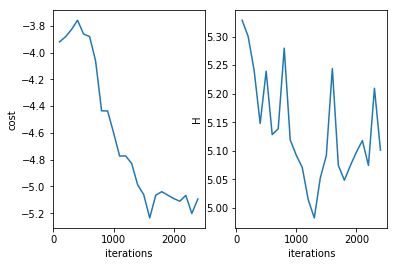

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2500 
H 5.117652555441131
cost -5.10958167769512


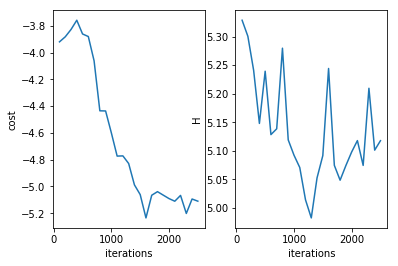

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2600 
H 5.069422560783301
cost -5.061455930462269


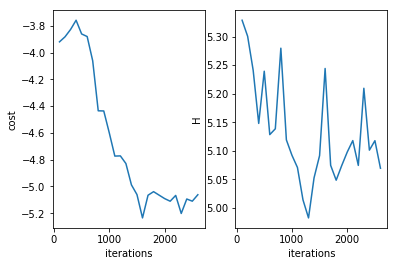

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2700 
H 5.077318658398052
cost -5.070569329571992


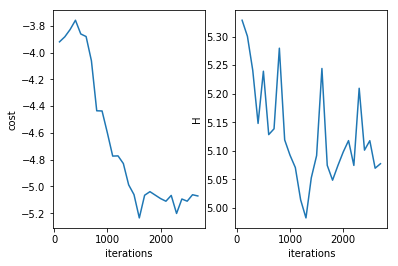

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2800 
H 5.096666774900206
cost -5.089780231006357


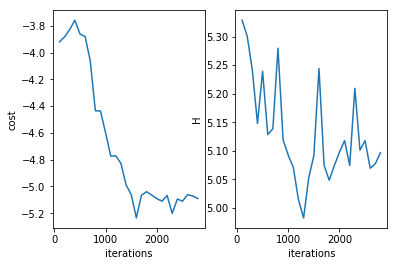

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 2900 
H 5.130393244693389
cost -5.117934286850517


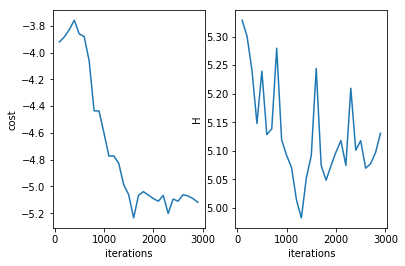

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3000 
H 5.017571680679639
cost -5.010025780744509


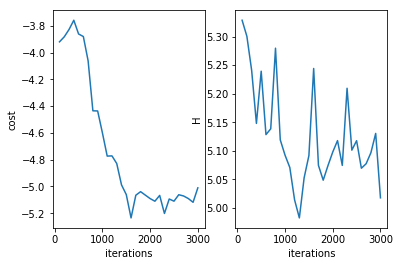

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3100 
H 5.08602164348289
cost -5.077877434865328


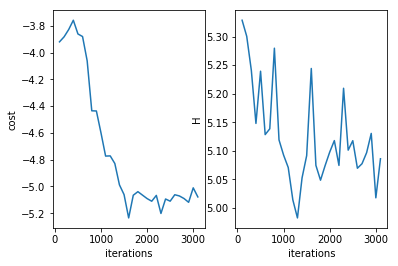

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 3200 
H 4.968280479052369
cost -4.962373946370199


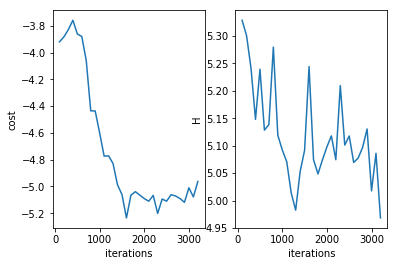

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3300 
H 5.084954169373334
cost -5.078737986151264


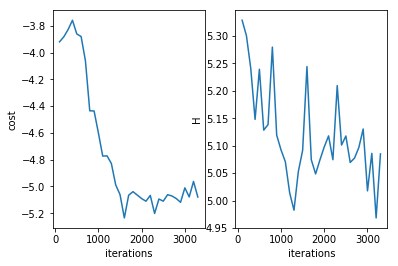

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3400 
H 5.117020394931545
cost -5.10989427565117


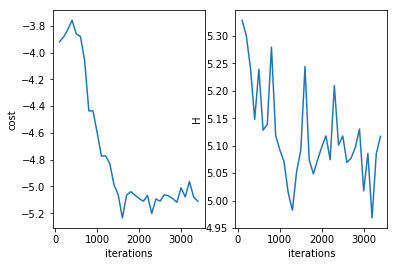

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3500 
H 5.058083484933384
cost -5.051019055183138


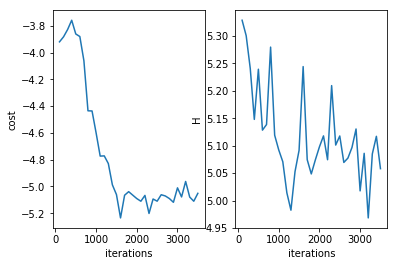

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3600 
H 5.288354630607197
cost -5.280031656110595


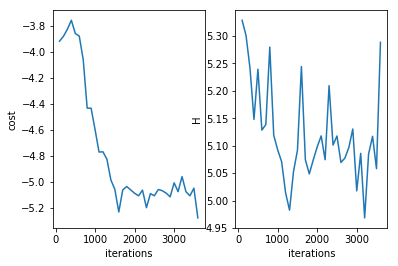

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3700 
H 5.158953528627003
cost -5.151235136741613


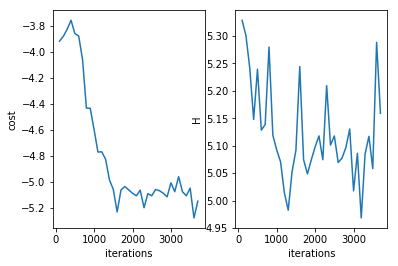

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3800 
H 5.0586223043022915
cost -5.053481369549028


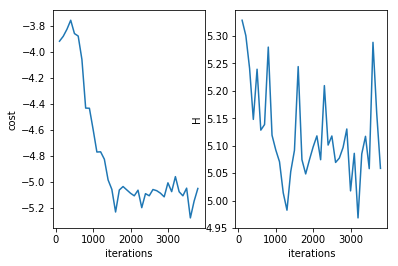

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 3900 
H 5.1327769967844725
cost -5.124202676454704


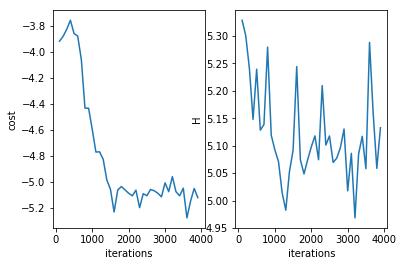

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4000 
H 5.077399821867919
cost -5.068861369876161


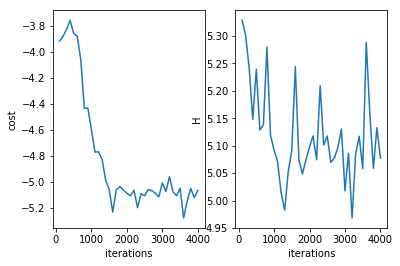

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4100 
H 5.109533756293303
cost -5.104156732796876


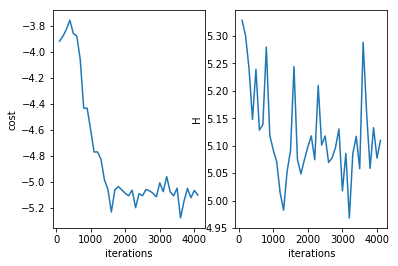

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4200 
H 5.044874579136723
cost -5.037367999200396


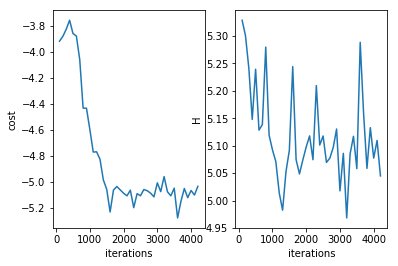

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4300 
H 5.070883890851179
cost -5.064048978498951


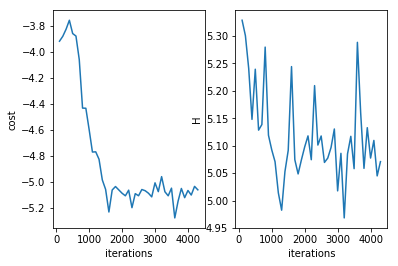

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4400 
H 5.046132882925616
cost -5.041286620418018


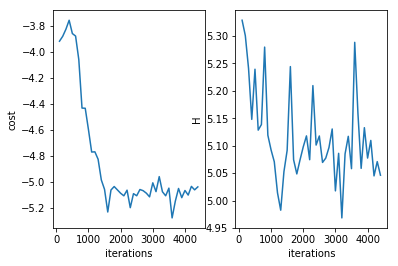

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4500 
H 5.119738456365243
cost -5.113135493327805


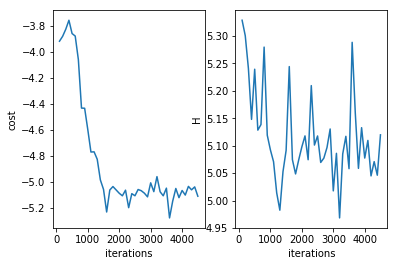

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4600 
H 5.064835249888705
cost -5.057259318040872


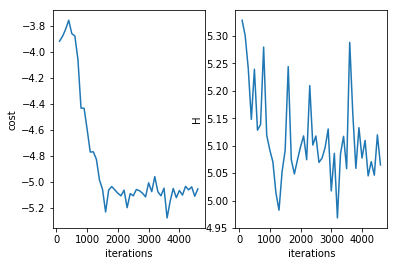

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4700 
H 4.981847118970137
cost -4.97616069805673


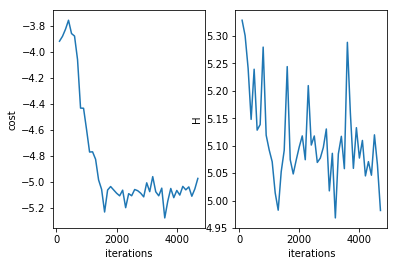

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4800 
H 5.055279467102411
cost -5.050353435920259


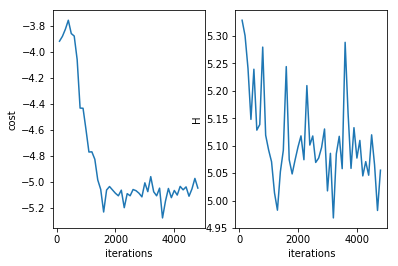

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 4900 
H 5.119444436803217
cost -5.112049650662943


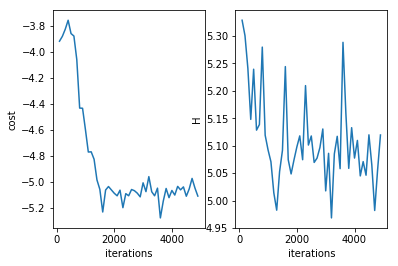

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5000 
H 5.123442403257496
cost -5.116567966638773


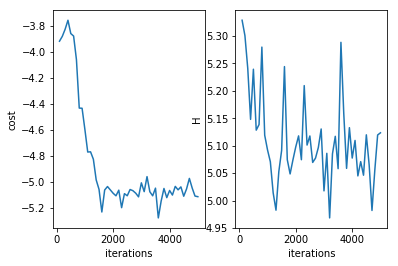

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5100 
H 5.115450831471032
cost -5.109698683738605


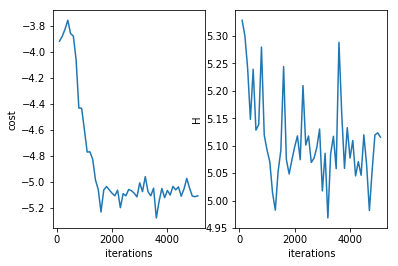

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5200 
H 5.064856925558219
cost -5.057436803994386


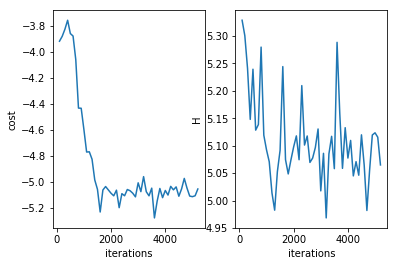

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5300 
H 5.1303841074659635
cost -5.1214820803315435


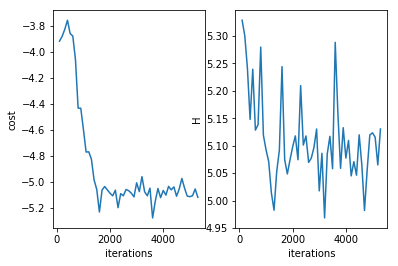

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5400 
H 4.953741321915925
cost -4.94647686168851


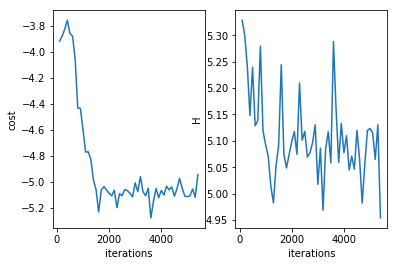

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5500 
H 5.066190543610193
cost -5.058218124237599


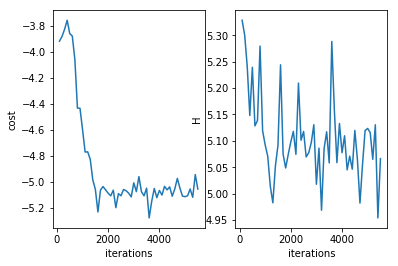

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5600 
H 5.157343717514601
cost -5.147125149281828


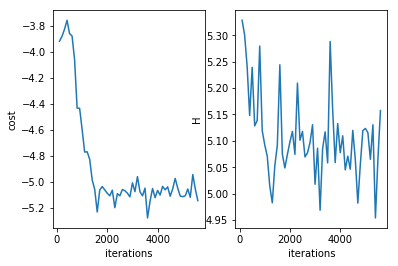

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5700 
H 5.055165073623936
cost -5.048073676261825


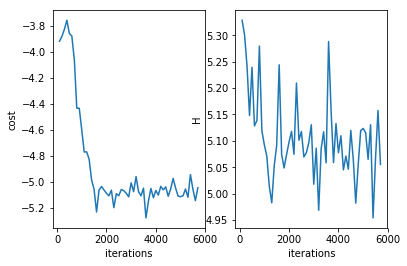

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5800 
H 5.089258636882569
cost -5.08209787273601


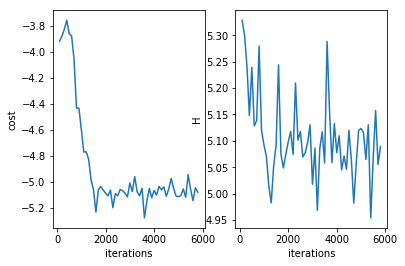

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 5900 
H 5.139939047943258
cost -5.1325564528065595


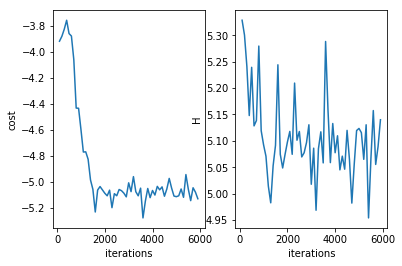

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6000 
H 5.115076070829182
cost -5.1085476390300215


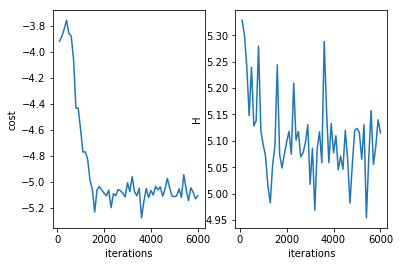

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6100 
H 5.129166645434674
cost -5.122038266524461


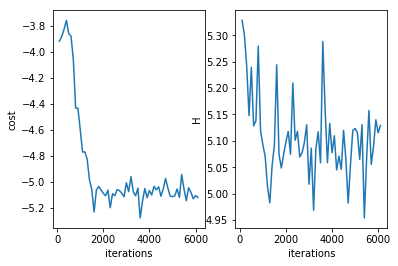

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6200 
H 5.151350620916082
cost -5.144406920939107


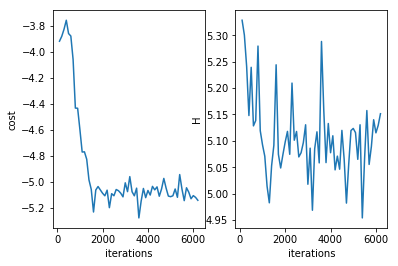

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 6300 
H 5.081641290391186
cost -5.075935733893081


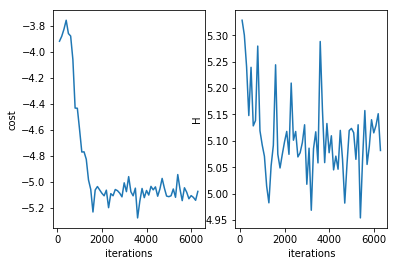

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6400 
H 5.102703803049536
cost -5.095353671430093


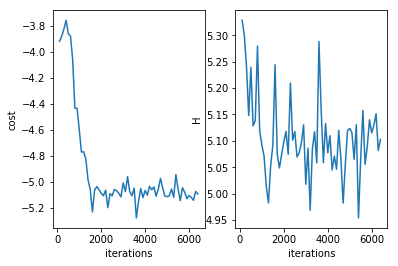

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6500 
H 5.129420608054897
cost -5.122270907409507


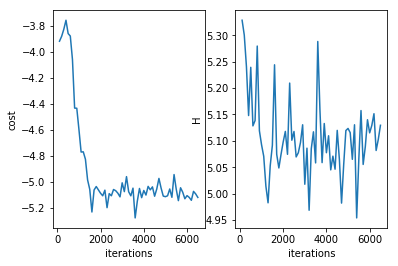

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6600 
H 5.070159504167916
cost -5.064700955316519


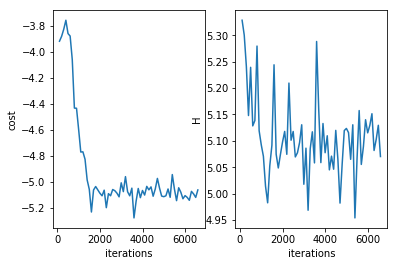

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6700 
H 5.156960680268622
cost -5.147298270083328


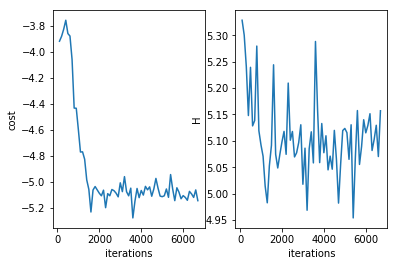

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6800 
H 5.159691753589636
cost -5.153580787839921


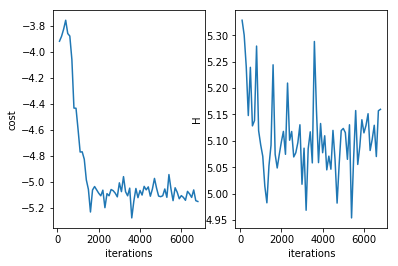

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 6900 
H 5.123409403485166
cost -5.11370701144143


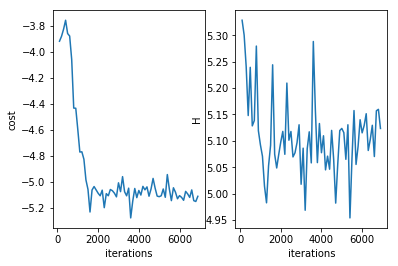

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7000 
H 5.038947112598909
cost -5.0320868112633415


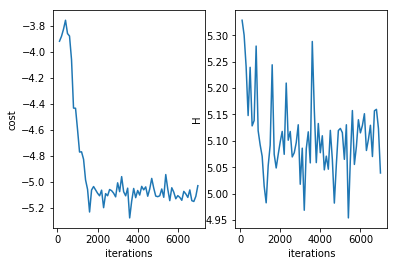

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7100 
H 5.049184017895689
cost -5.0435760846053475


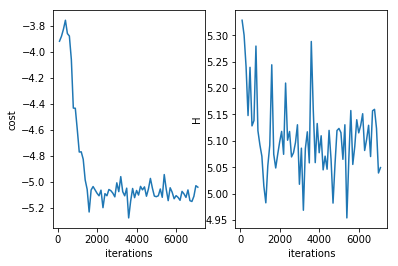

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7200 
H 5.149957926281921
cost -5.142512803721337


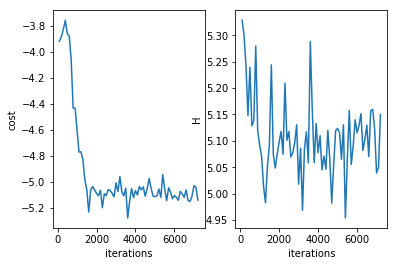

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7300 
H 5.097063623592043
cost -5.0906528543870975


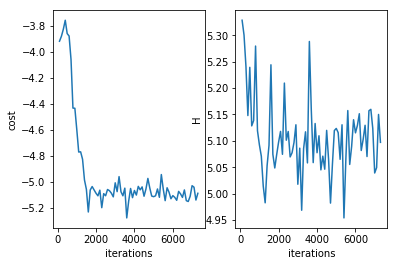

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7400 
H 5.142067727055206
cost -5.136422570144946


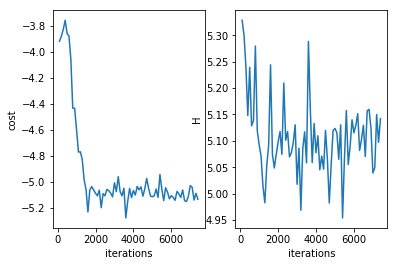

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7500 
H 5.1701041399136205
cost -5.163804031950963


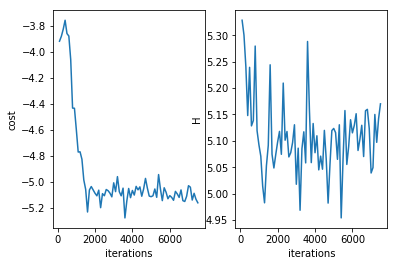

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7600 
H 5.085122727372176
cost -5.077784798502858


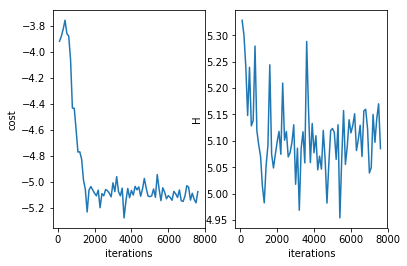

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7700 
H 5.081924875678029
cost -5.07285637630057


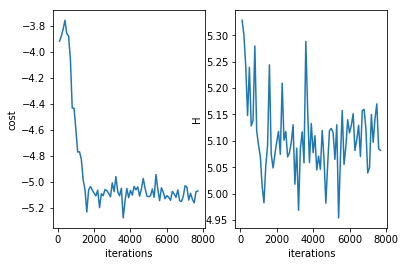

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7800 
H 5.016077544921794
cost -5.004823540422169


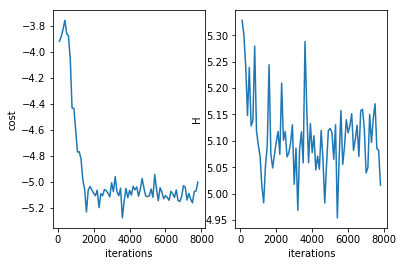

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 7900 
H 5.030428170097093
cost -5.02139169569685


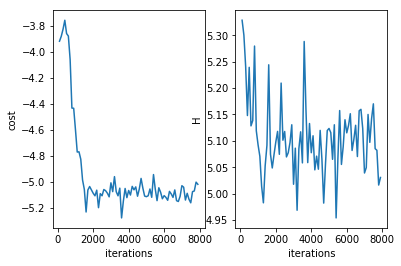

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8000 
H 5.101338890342442
cost -5.095431691748116


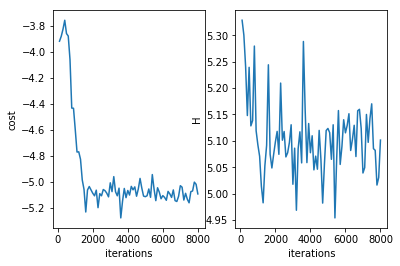

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8100 
H 5.123285438350196
cost -5.116492912932533


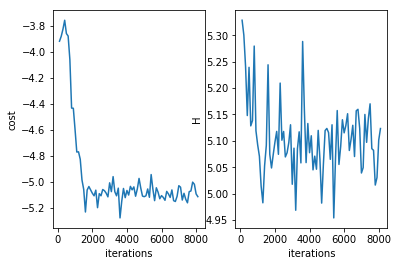

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8200 
H 5.002303630033341
cost -4.9958144067271215


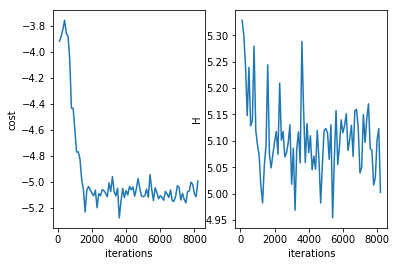

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8300 
H 5.122808346480138
cost -5.114519701523184


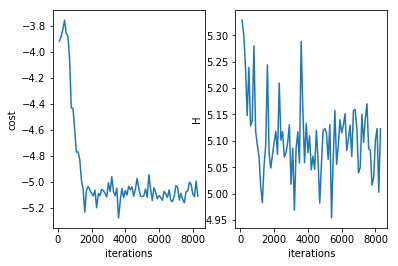

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8400 
H 5.107006616426432
cost -5.10097199608055


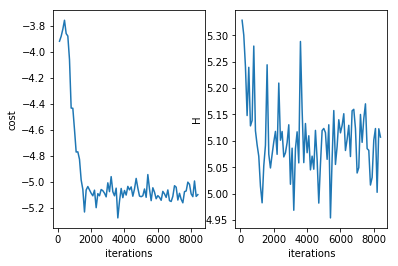

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8500 
H 5.104175875114524
cost -5.09760305275003


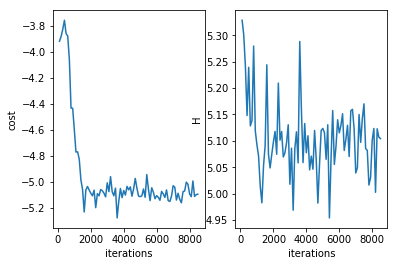

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8600 
H 5.126033303831071
cost -5.119783235472014


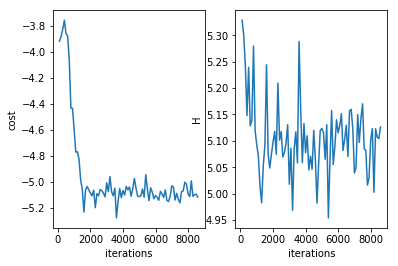

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8700 
H 5.170934906399855
cost -5.164098907941715


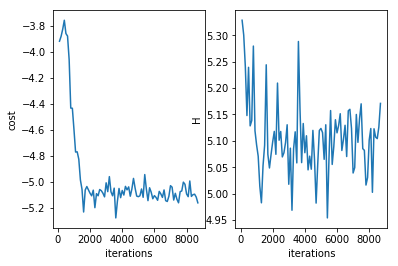

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8800 
H 5.116765986219825
cost -5.110014570600097


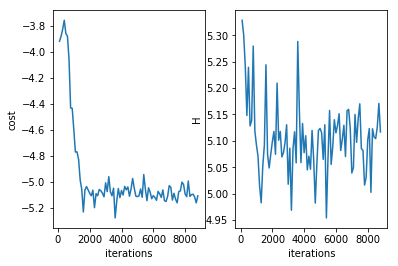

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 8900 
H 5.128552274555933
cost -5.1223151741956805


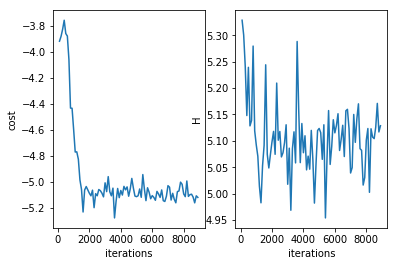

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 9000 
H 5.014334016526268
cost -5.0065038144494975


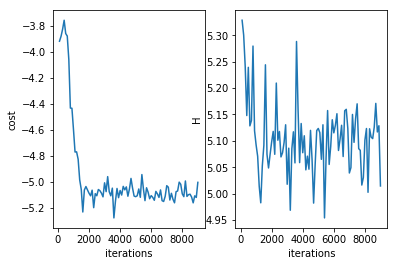

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************
******************************************
it = 9100 
H 5.095712492614204
cost -5.0882613788038915


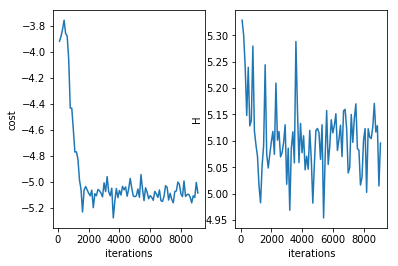

saving to results//tb/linear_2D_D=4_T=1_flow=1P_rs=0/  ...
******************************************


KeyboardInterrupt: 

In [ ]:
random_seed = 0;

TIF_flow_type = 'PlanarFlowLayer';
nlayers = 1;
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

n = 1000;
k_max = 1;
c_init = 1e-2;
lr_order = -3;
check_rate = 100;
max_iters = 25000;

np.random.seed(0);

cost, phi, T_x = train_dsn(system, behavior, n, flow_dict, \
                       k_max=k_max, c_init=c_init, lr_order=lr_order, check_rate=check_rate, \
                       max_iters=max_iters, random_seed=random_seed);



In [ ]:
x_real = tf.placeholder(dtype=tf.float32, shape=());
x = tf.complex(x_real, 0.0);
print(x);
y = tf.sqrt(x) + tf.complex(x_real, 0.0);
y_real = tf.real(y);

grad = tf.gradients(y_real, x_real);

sess = tf.Session();
_grad = sess.run(grad, {x_real:-2});
print(_grad);
